<a href="https://colab.research.google.com/github/goeunleee/deeplearning_stuey/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D1%EC%9D%BC_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! apt-get update -qq
! apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 144579 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

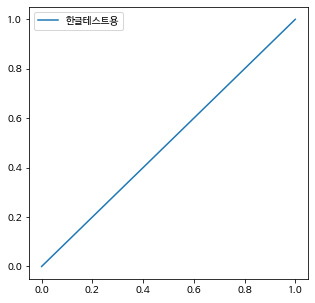

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

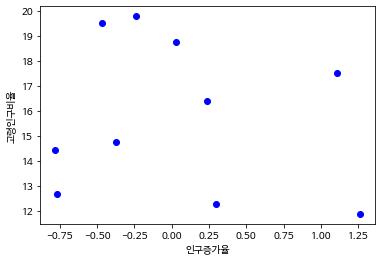

In [ ]:
#population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37]

#population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74]

population_inc = [0.3, -0.78, 1.26, 0.03, 1.11,  0.24, -0.24, -0.47, -0.77, -0.37]

population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74]

plt.plot(population_inc, population_old, 'bo')
plt.xlabel('인구증가율')
plt.ylabel('고령인구비율')
plt.show()

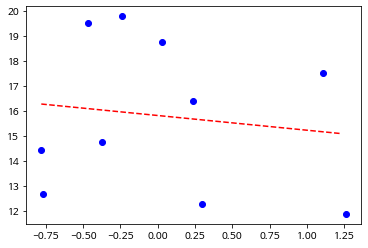

In [ ]:
# 최소 제곱법

x_bar = sum(population_inc)/len(population_inc)
y_bar = sum(population_old)/len(population_old)

x = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37]
x = x[:5] + x[6:]
y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74]
y = y[:5]+y[6:]




#원래 값 - 구해진 값
# y = a * x + b

a = sum([(y-y_bar)*(x-x_bar) for y, x in list(zip(y,x))])

a = a / sum([(i-x_bar)**2 for i in x ])
#기울기 a = (x-x평균 )(y-y평균)의 합 / (x-x평균)의 제곱의 합
a

b = y_bar - (a*x_bar)
#절편 b = y평균 - (x 평균 * a)

import numpy as np

line_x = np.arange(min(x), max(x),1)
line_y =a * line_x + b
plt.plot(line_x, line_y, 'r--')

plt.plot(x,y,'bo')

plt.show()

In [ ]:
a = [1,2,3]
b = [4,5,6]

for i,j in list(zip(a,b)):
  print(i,j)

1 4
2 5
3 6
